In [6]:
# 1，tensorflow介绍：
import tensorflow as tf

m1 = tf.constant([3, 5])
m2 = tf.constant([2, 4])

result = tf.add(m1, m2)   # 1，图的定义：只是在图中定义所需要的运算，并没有去执行

sess = tf.Session()
result_run = sess.run(result)  # 2，图的执行阶段：在会话(session)中执行图模型定义好的运算
print(result_run)
sess.close()

with tf.Session() as sess:    # 使用with代码块的形式，无需调用close释放资源，而是会自动关闭绘画
    res = sess.run(result)
print(res)

[5 9]
[5 9]


In [7]:
# 2,IMDB电影评价的情感分析：
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(tf.__version__)

1.12.0


In [8]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 7s 0us/step


In [10]:
print("trining entries: {}, labels: {}".format(len(train_data), len(train_labels)))

trining entries: 25000, labels: 25000


In [11]:
# Convert the integers back to words:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[0])

1646592/1641221 [==============================] - 1s 1us/step


"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [12]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
print(train_data[0])

In [13]:
# model:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [17]:
# 训练模型：
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

/home/jesse/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 58us/step - loss: 0.6923 - acc: 0.5185 - val_loss: 0.6910 - val_acc: 0.5422
Epoch 2/40
15000/15000 [==============================] - 1s 40us/step - loss: 0.6879 - acc: 0.6456 - val_loss: 0.6847 - val_acc: 0.7344
Epoch 3/40
15000/15000 [==============================] - 1s 39us/step - loss: 0.6782 - acc: 0.7461 - val_loss: 0.6720 - val_acc: 0.7426
Epoch 4/40
15000/15000 [==============================] - 1s 34us/step - loss: 0.6593 - acc: 0.7596 - val_loss: 0.6504 - val_acc: 0.7540
Epoch 5/40
15000/15000 [==============================] - 1s 34us/step - loss: 0.6303 - acc: 0.7865 - val_loss: 0.6183 - val_acc: 0.7799
Epoch 6/40
15000/15000 [==============================] - 0s 33us/step - loss: 0.5914 - acc: 0.8063 - val_loss: 0.5790 - val_acc: 0.7960
Epoch 7/40
15000/15000 [==============================] - 1s 33us/step - loss: 0.5448 - acc: 0.8248 - val_loss: 0.5352 - val_acc

25000/25000 [==============================] - 0s 20us/step
[0.3238787423706055, 0.87304]


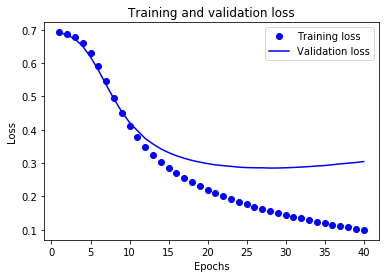

In [21]:
# 评估模型：
results = model.evaluate(test_data, test_labels)
print(results)


history_dict = history.history
history_dict.keys()

# 画图：
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

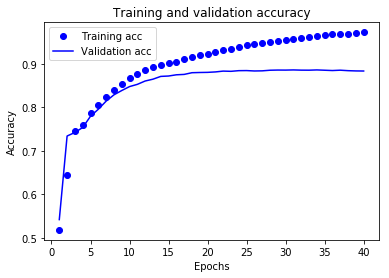

In [22]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()